In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 78.0MB/s]
 97% 262M/271M [00:03<00:00, 78.6MB/s]
100% 271M/271M [00:03<00:00, 89.4MB/s]
 96% 521M/543M [00:14<00:01, 22.4MB/s]
100% 543M/543M [00:14<00:00, 38.2MB/s]


In [0]:
from zipfile import ZipFile
file_name = 'test1.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()

In [0]:
from zipfile import ZipFile
file_name = 'train.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()

In [0]:
#specifying train and test directories
train_dir = '/train'
test_dir = '/test1'

In [0]:
import os as os

In [0]:
os.mkdir('validation_dir')

In [0]:
os.mkdir('train_cats_dir')
os.mkdir('test_cats_dir')
os.mkdir('validation_cats_dir')

os.mkdir('train_dogs_dir')
os.mkdir('validation_dogs_dir')
os.mkdir('test_dogs_dir')

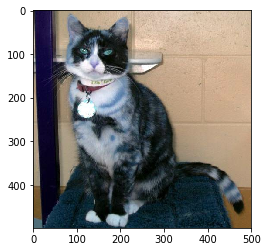

In [24]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('train/' + fnames[9999])
plt.imshow(img)

In [0]:
import shutil
for fname in fnames:
  src = os.path.join('train',fname)
  dst = os.path.join('train_cats_dir',fname)
  shutil.copyfile(src,dst)

In [0]:
#validation set for cats will be 1250 images
fnames = ['cat.{}.jpg'.format(i) for i in range(10000,11250)]
for fname in fnames:
  src = os.path.join('train',fname)
  dst = os.path.join('validation_cats_dir',fname)
  shutil.copyfile(src,dst)

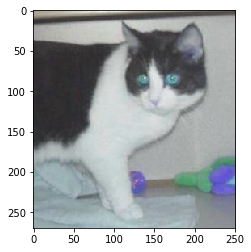

In [39]:
img = cv2.imread('validation_cats_dir/' + fnames[1249])
plt.imshow(img)

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(11250,12500)]
for fname in fnames:
  src = os.path.join('train',fname)
  dst = os.path.join('test_cats_dir',fname)
  shutil.copyfile(src,dst)

In [0]:
fnames = ['dog.{}.jpg'.format(i) for i in range(10000)]
for fname in fnames:
  src = os.path.join('train',fname)
  dst = os.path.join('train_dogs_dir',fname)
  shutil.copyfile(src,dst)

In [0]:
fnames = ['dog.{}.jpg'.format(i) for i in range(10000,11250)]
for fname in fnames:
  src = os.path.join('train',fname)
  dst = os.path.join('validation_dogs_dir',fname)
  shutil.copyfile(src,dst)

In [0]:
fnames = ['dog.{}.jpg'.format(i) for i in range(11250,12500)]
for fname in fnames:
  src = os.path.join('train',fname)
  dst = os.path.join('test_dogs_dir',fname)
  shutil.copyfile(src,dst)

In [45]:
len(os.listdir('train_cats_dir'))

10000

In [46]:
#sanity checks

len(os.listdir('validation_dogs_dir'))

1250

In [47]:
len(os.listdir('train_cats_dir')) + len(os.listdir('validation_cats_dir')) + len(os.listdir('test_cats_dir'))

12500

In [50]:
img.shape

(270, 251, 3)

In [0]:
from keras.preprocessing import image
from keras import optimizers
from keras import layers,models
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import DenseNet121, DenseNet169, DenseNet201
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam


In [74]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [75]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [0]:
model.compile(loss = 'binary_crossentropy',
             optimizer = Adam(),
             metrics = ['acc'])

In [104]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        'train_dir',
     
        target_size=(150, 150),
        batch_size=32,
        
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'validation_dir',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)
  



Found 20000 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
100/100 [==============================] - 32s 325ms/step - loss: 0.6942 - acc: 0.5184 - val_loss: 0.6938 - val_acc: 0.5012
Epoch 2/100
100/100 [==============================] - 28s 280ms/step - loss: 0.6905 - acc: 0.5281 - val_loss: 0.6871 - val_acc: 0.5025
Epoch 3/100
100/100 [==============================] - 27s 265ms/step - loss: 0.6917 - acc: 0.5294 - val_loss: 0.6851 - val_acc: 0.5150
Epoch 4/100
100/100 [==============================] - 27s 273ms/step - loss: 0.6887 - acc: 0.5528 - val_loss: 0.6816 - val_acc: 0.5693
Epoch 5/100
100/100 [==============================] - 28s 279ms/step - loss: 0.6806 - acc: 0.5531 - val_loss: 0.6779 - val_acc: 0.5267
Epoch 6/100
100/100 [==============================] - 27s 266ms/step - loss: 0.6825 - acc: 0.5606 - val_loss: 0.6799 - val_acc: 0.5506
Epoch 7/100
100/100 [==============================

In [0]:
model.save('cats_and_dogs.h5')

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc) + 1)


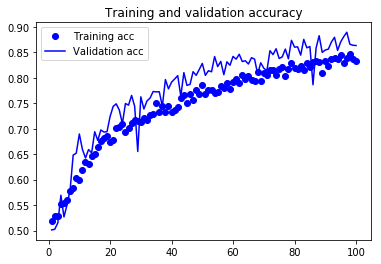

In [110]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

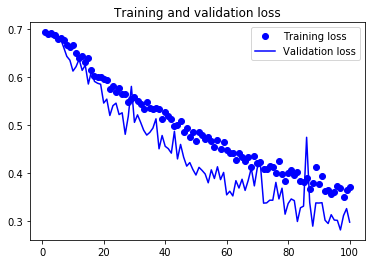

In [111]:
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
import pandas as pd
test_filenames = os.listdir('test1')
test_df = pd.DataFrame({
    'filename' : test_filenames
})

nb_samples = test_df.shape[0]

In [118]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "test1", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(150,150),
    batch_size=32,
    shuffle=False
)

Found 12500 images.


In [0]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/32))

In [120]:
print(predict)

[[8.3512068e-04]
 [9.8286617e-01]
 [7.8594476e-02]
 ...
 [7.0681965e-01]
 [5.5082679e-02]
 [9.7936380e-01]]


In [123]:
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,id,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [0]:
submission['label'] = predict

In [125]:
submission.head()

,id,label
0,1,0.000835
1,2,0.982866
2,3,0.078594
3,4,0.569623
4,5,0.004514


In [0]:
threshold = 0.5
test_df['probability'] = predict
test_df['category'] = np.where(test_df['probability'] > threshold, 1,0)

In [0]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)


In [134]:
submission.head()

,id,label
0,1,0.000835
1,2,0.982866
2,3,0.078594
3,4,0.569623
4,5,0.004514
